# ДИПЛОМ 

## Часть 1

### Изучение исходных данных и предметной области. Отбор признаков запросов, которые можно использовать при решении задачи и обоснование данного выбора.

In [1]:
pip install pandas


Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install retentioneering

^C
Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import numpy as np
import time
from user_agents import parse


**Загрузка данных из database.csv в перемнную data

In [6]:

data = pd.read_csv("database.csv", delimiter=';', on_bad_lines='skip')

data.head(10)



C:\Users\Egor\AppData\Local\Temp/ipykernel_21352/3484857636.py:1: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("database.csv", delimiter=';', on_bad_lines='skip')


,body_bytes_sent,http_referer,http_user_agent,remote_addr,request_method,request_path,request_proto,request_time,status,time_local
0,150,NaN,NaN,104.28.194.159,CONNECT,mitigator.ru,HTTP/1.1,0.040,400,2023-01-18 03:26:20
1,150,NaN,NaN,18.143.169.60,CONNECT,mitigator.ru,HTTP/1.1,0.273,400,2023-01-18 03:26:20
2,150,NaN,NaN,18.143.169.60,CONNECT,mitigator.ru,HTTP/1.1,0.269,400,2023-01-18 03:26:20
3,150,NaN,NaN,165.154.236.174,CONNECT,mitigator.ru,HTTP/1.1,0.203,400,2023-01-18 03:26:20
4,150,NaN,NaN,18.143.169.60,CONNECT,mitigator.ru,HTTP/1.1,0.270,400,2023-01-18 03:26:20
5,150,NaN,NaN,18.143.169.60,CONNECT,mitigator.ru,HTTP/1.1,0.266,400,2023-01-18 03:26:20
6,150,NaN,NaN,118.99.103.60,\x16\x03\x01\x01N\x01\x00\x01J\x03\x03\xC7m\xD...,+!\xFD\x8E\xC5\xC9\x8D{\x95|\x85\xE25\x95\xCF\...,\xA0\x00f\x13\x02\x13\x03\x13\x01\xC0/\xC0+\xC...,0.219,400,2023-01-18 03:26:20
7,150,NaN,NaN,165.154.236.174,CONNECT,mitigator.ru,HTTP/1.1,0.188,400,2023-01-18 03:26:20
8,150,NaN,NaN,91.229.114.99,CONNECT,mitigator.ru,HTTP/1.1,0.189,400,2023-01-18 03:26:20
9,150,NaN,NaN,91.229.114.99,CONNECT,mitigator.ru,HTTP/1.1,0.189,400,2023-01-18 03:26:21


In [ ]:
data.info()

**Загружаем в новую переменную отфильтрованные данные, где 'http_user_agent' и 'request_path' не NaN, т.к. эти данные пригодны для дальнейшего анализа. 

In [ ]:
df = data[~data[['http_user_agent','request_path']].isna().any(axis=1)].reset_index(drop=True)

In [ ]:
df.info()

In [ ]:
#Проверка того, скольким запросам соответствует определенный статус 

array_code_status = df['status'].unique().tolist()
list_col_status = []


for i in array_code_status:
    count_raws = df[df['status'] == i].shape[0]
    list_col_status.append(count_raws)

for i in range(len(array_code_status)):
    print(f'Статус "{array_code_status[i]}" - {list_col_status[i]} ({round(list_col_status[i]/df.shape[0]*100, 3)}%)')

**200 OK — успешный запрос. Если клиентом были запрошены какие-либо данные, то они находятся в заголовке и/или теле сообщения. Появился в HTTP/1.0.

**206 Partial Content — сервер удачно выполнил частичный GET-запрос, возвратив только часть сообщения. В заголовке Content-Range сервер указывает байтовые диапазоны содержимого. Особое внимание при работе с подобными ответами следует уделить кэшированию. Появился в HTTP/1.1.

**301 Moved Permanently — запрошенный документ был окончательно перенесен на новый URI, указанный в поле Location заголовка. Некоторые клиенты некорректно ведут себя при обработке данного кода. Появился в HTTP/1.0.

**304 Not Modified — сервер возвращает такой код, если клиент запросил документ методом GET, использовал заголовок If-Modified-Since или If-None-Match и документ не изменился с указанного момента. При этом сообщение сервера не должно содержать тела. Появился в HTTP/1.0.

**400 Bad Request — сервер обнаружил в запросе клиента синтаксическую ошибку. Появился в HTTP/1.0.

**404 Not Found[20] — самая распространённая ошибка при пользовании Интернетом, основная причина — ошибка в написании адреса Web-страницы. Сервер понял запрос, но не нашёл соответствующего ресурса по указанному URL. Если серверу известно, что по этому адресу был документ, то ему желательно использовать код 410. Ответ 404 может использоваться вместо 403, если требуется тщательно скрыть от посторонних глаз определённые ресурсы. Появился в HTTP/1.0.

**405 Method Not Allowed — указанный клиентом метод нельзя применить к текущему ресурсу. В ответе сервер должен указать доступные методы в заголовке Allow, разделив их запятой. Эту ошибку сервер должен возвращать, если метод ему известен, но он не применим именно к указанному в запросе ресурсу, если же указанный метод не применим на всём сервере, то клиенту нужно вернуть код 501 (Not Implemented). Появился в HTTP/1.1.

**408 Request Timeout — время ожидания сервером передачи от клиента истекло. Клиент может повторить аналогичный предыдущему запрос в любое время. Например, такая ситуация может возникнуть при загрузке на сервер объёмного файла методом POST или PUT. В какой-то момент передачи источник данных перестал отвечать, например, из-за повреждения компакт-диска или потери связи с другим компьютером в локальной сети. Пока клиент ничего не передаёт, ожидая от него ответа, соединение с сервером держится. Через некоторое время сервер может закрыть соединение со своей стороны, чтобы дать возможность другим клиентам сделать запрос. Этот ответ не возвращается, когда клиент принудительно остановил передачу по команде пользователя или соединение прервалось по каким-то иным причинам, так как ответ уже послать невозможно. Появился в HTTP/1.1.

**499 Client Closed Request — нестандартный код, предложенный и используемый nginx для случаев, когда клиент закрыл соединение, пока nginx обрабатывал запрос.

**503 Service Unavailable — сервер временно не имеет возможности обрабатывать запросы по техническим причинам (обслуживание, перегрузка и прочее). В поле Retry-After заголовка сервер может указать время, через которое клиенту рекомендуется повторить запрос. Хотя во время перегрузки очевидным кажется сразу разрывать соединение, эффективней может оказаться установка большого значения поля Retry-After для уменьшения частоты избыточных запросов. Появился в HTTP/1.0.

**504 Gateway Timeout — сервер в роли шлюза или прокси-сервера не дождался ответа от вышестоящего сервера для завершения текущего запроса. Появился в HTTP/1.1.

Вывод: 50% запросов была редиректами, а 25.5% успешными
     

In [ ]:
#Проверка того, какие запросы являются нагруженными и насколько нагруженными

stack_bytes = []

for i in array_code_status:
    filtered_df = df[df['status'] == i]
    byte_array = filtered_df['body_bytes_sent'].unique().tolist()
#     print(f'Для случая статуса {i}')
    for k in byte_array:
        
        count_raws_bytes = filtered_df[filtered_df['body_bytes_sent']==k].shape[0]
        if count_raws_bytes > 100:
            
            #добавляем count_raws_bytes в стек [статус, кол.байт, кол.случаев]
            stack_bytes.append([i, k, count_raws_bytes])
        
#         print(f'{k} байтов - в {count_raws_bytes} случаях')
#     print('\n')
        

In [ ]:
#Выведем основные случаи

for i in range(len(stack_bytes)):
    print(f'{stack_bytes[i][1]} байтов - в {stack_bytes[i][2]} со статусом {stack_bytes[i][0]}')

Вывод: можно сделать вывод, что при редиректах отправляется 162 байта, при разрывах соединения 0 байт, а вот при статусе 200 очень большое разнообразие отправленных байтов. (Стоит особо обращать внимание на статус 200)

In [ ]:
# Рассмотрение случаев, где отправленныех байтов >1000, а также, какие чаще всего нагружатся методы (request_method)
request_methods = df['request_method'].unique().tolist()
filtered_df = df[df['body_bytes_sent'] > 1000]

for i in request_methods:
    raws = filtered_df[filtered_df['request_method'] == i].shape[0]
    print(f'Метод {i}: {raws} случаев')


Вывод: Самые нагруженные запросы осуществаляются с помощью метода 'GET'. (ВАЖНО!)

In [ ]:
#Рассмотрение уникальноности ip пользователей и user_agent

col_ip_users = df['remote_addr'].unique().shape[0]

col_users_agent = df['http_user_agent'].unique().shape[0]

print(f'Количество уникальных пользователей: {col_ip_users}')
print(f'Количество уникальных user_agent: {col_users_agent}')

Вывод: это означает, что под одиними и теми же user_agent заходят с разных ip. (Допущения: человек с одного
        и того же устройства заходит из дома и с работы на данный сайт, подключивших к разным wi-fi сетям)
    (Нужен дополнительный временной аналиЗ, а именно, как быстро и user_agent меняет ip адреса.)

In [ ]:
#За индекс датасета принимаем время 

df['time_local'] = pd.to_datetime(df['time_local'])
df.set_index('time_local', inplace=True)

In [ ]:
pip install pyyaml ua-parser user-agents

In [ ]:

stack_bot = []
stack_tablet = []
stack_pc = []
# stack_touch_capable = []
stack_mobile = []

unique_user_agent = df['http_user_agent'].unique()
unique_user_agent_list = unique_user_agent.tolist()
for i in range(len(unique_user_agent_list)):
    ua_string = unique_user_agent_list[i]
    user_agent = parse(ua_string)
    
    if user_agent.is_mobile:
        stack_mobile.append(ua_string)
    
    if user_agent.is_tablet:
        stack_tablet.append(ua_string)
    
    if user_agent.is_pc:
        stack_pc.append(ua_string)
        
    else:
        stack_bot.append(ua_string)
        
print(len(stack_mobile))
print(len(stack_tablet))
print(len(stack_pc))
print(len(stack_bot))

In [ ]:
df['bot'] = False
df['mobile'] = False
df['pc']= False
df['tablet'] = False

df.loc[df['http_user_agent'].isin(stack_bot),'bot'] = True
df.loc[df['http_user_agent'].isin(stack_mobile),'mobile'] = True
df.loc[df['http_user_agent'].isin(stack_pc),'pc'] = True
df.loc[df['http_user_agent'].isin(stack_tablet),'tablet'] = True

In [ ]:
filtered_df_for_hour = []

for i in range(24):
    if i == 23:
        data = df[(df.index.time > pd.to_datetime('23:00').time()) & (df.index.time < pd.to_datetime('23:59:59').time())]
    else: 
        data = df[(df.index.time > pd.to_datetime(f'{i}:00').time()) & (df.index.time < pd.to_datetime(f'{i+1}:00').time())]
    filtered_df_for_hour.append(data)

In [ ]:
filtered_df_for_hour[23].head(10)

In [ ]:
# Разделение пользователей на ботов, людей и пауки, сканеры (ПО)

stack_pc = []
stack_bot = []
stack_mobile = []
stack_tablet = []

stack_pc_col = []
stack_bot_col = []
stack_mobile_col = []
stack_tablet_col = []

for i in range(24):
    pc_rows = filtered_df_for_hour[i][filtered_df_for_hour[i]['pc']==True]
    stack_pc_col.append(pc_rows.shape[0])
    stack_pc.append(pc_rows)
    
    bot_rows = filtered_df_for_hour[i][filtered_df_for_hour[i]['bot']==True]
    stack_bot_col.append(bot_rows.shape[0])
    stack_bot.append(bot_rows)
    
    mobile_rows = filtered_df_for_hour[i][filtered_df_for_hour[i]['mobile']==True]
    stack_mobile_col.append(mobile_rows.shape[0])
    stack_pc.append(mobile_rows)
    
    tablet_rows = filtered_df_for_hour[i][filtered_df_for_hour[i]['tablet']==True]
    stack_tablet_col.append(tablet_rows.shape[0])
    stack_pc.append(tablet_rows)


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
hours = list(range(24))

#График для ботов, посетивших сайт
plt.figure(figsize=(12, 7))
plt.plot(hours, stack_bot_col, marker='o')

plt.ylabel('Количество ботов')
plt.xlabel('Время суток (часы)')
plt.title('Количество ботов посещающих сайт по часам')
plt.grid(which='both', linewidth=0.5) 
plt.show()

#График для посетителей сайта, зашедших с компьютера
plt.figure(figsize=(12, 7))
plt.plot(hours, stack_pc_col, marker='o')

plt.ylabel('Количество посетителей')
plt.xlabel('Время суток (часы)')
plt.title('Количество посетителей, зашедших с компьютера часам')
plt.grid(which='both', linewidth=0.5) 
plt.show()

#График для посетителей сайта, зашедших с мобильных устройств
plt.figure(figsize=(12, 7))
plt.plot(hours, stack_mobile_col, marker='o')

plt.ylabel('Количество посетителей')
plt.xlabel('Время суток (часы)')
plt.title('Количество посетителей, зашедших с мобильных устройств по часам')
plt.grid(which='both', linewidth=0.5) 
plt.show()

#График для посетителей сайта, зашедших с планшетов
plt.figure(figsize=(12, 7))
plt.plot(hours, stack_tablet_col, marker='o')

plt.ylabel('Количество посетителей')
plt.xlabel('Время суток (часы)')
plt.title('Количество посетителей, зашедших с планшетных устройств по часам')
plt.grid(which='both', linewidth=0.5) 
plt.show()

Отсюда видно, что пик посетителей достигается (анализ за все время):
- в 7 часов для планшетных устройств
- в 7-8 часов для мобильных устройств
- в 8 часов для пользователей ПК 
- в 7 часов, но это один из пикок, т.к. независимо от времени суток, боты активны всегда.

In [ ]:
#объедим метки класса в один столбец

df['bot'] = df['bot'].replace({True: 'bot', False:''})
df['mobile'] = df['mobile'].replace({True: 'mobile', False:''})
df['pc'] = df['pc'].replace({True: 'pc', False:''})
df['tablet'] = df['tablet'].replace({True: 'tablet', False:''})

df['class'] = df['bot'] + df['mobile'] + df['pc'] + df['tablet']
display(df)

df = df.drop(['bot', 'mobile', 'pc', 'tablet'], axis=1)


In [ ]:
pip install geocoder

In [58]:
#Анализ ip (из какой страны заходит пользователь)

# import geocoder
# # list_ip_address = ['104.28.194.159',
# #                   '18.143.169.60']
# ip_address = df['remote_addr'].unique()
# list_ip_address = ip_address.tolist()
# list_country = []
# list_timezone = []

# for i in list_ip_address:
#     location = geocoder.ip(i)
#     try:
#         res = location.json['raw']
#         list_country.append(res['country'])
#         list_timezone.append(res['timezone'])
#     except TypeError: 
#         list_country.append('Unknown')
#         list_timezone.append('Unknown')
# print(set(list_country))
# print(set(list_timezone))

In [59]:
#Меняем индекс датасета 

df['time_local'] = pd.to_datetime(df.index)
df['new_index'] = range(df.shape[0])
df.set_index('new_index', inplace=True)


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200764 entries, 0 to 200763
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   body_bytes_sent  200764 non-null  int64         
 1   http_referer     137798 non-null  object        
 2   http_user_agent  200764 non-null  object        
 3   remote_addr      200764 non-null  object        
 4   request_method   200764 non-null  object        
 5   request_path     200764 non-null  object        
 6   request_proto    200764 non-null  object        
 7   request_time     200764 non-null  float64       
 8   status           200764 non-null  int64         
 9   class            200764 non-null  object        
 10  time_local       200764 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2), object(7)
memory usage: 18.4+ MB


In [61]:
#Сессии пользователей (remote_addr) 
event_df = df
event_df.sort_values(by=['remote_addr','http_user_agent', 'time_local'], inplace=True)
event_df['time_diff'] = event_df.groupby(['remote_addr','http_user_agent'])['time_local'].diff(1)
max_session_gap = pd.Timedelta(seconds=30)
event_df.head(15)

,body_bytes_sent,http_referer,http_user_agent,remote_addr,request_method,request_path,request_proto,request_time,status,class,time_local,time_diff
new_index,,,,,,,,,,,,
186160,50921,NaN,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,1.0.208.223,GET,https://mitigator.ru/,HTTP/1.1,4.193,200,pc,2023-03-16 08:56:38,NaT
164223,50921,NaN,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,1.0.208.223,GET,https://mitigator.ru/,HTTP/1.1,1.067,200,pc,2023-03-16 08:55:49,NaT
171618,50921,NaN,Mozilla/5.0 (Windows NT 6.2; WOW64) AppleWebKi...,1.0.208.223,GET,https://mitigator.ru/,HTTP/1.1,4.237,200,pc,2023-03-16 08:56:05,NaT
173595,0,NaN,Mozilla/5.0 (Windows NT 6.2; WOW64) AppleWebKi...,1.0.208.223,GET,https://mitigator.ru/,HTTP/1.1,5.763,499,pc,2023-03-16 08:56:10,0 days 00:00:05
157188,50921,NaN,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,1.0.208.223,GET,https://mitigator.ru/,HTTP/1.1,0.940,200,pc,2023-03-16 08:55:33,NaT
157543,50921,NaN,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,1.0.208.223,GET,https://mitigator.ru/,HTTP/1.1,1.188,200,pc,2023-03-16 08:55:34,0 days 00:00:01
157955,50921,NaN,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,1.0.208.223,GET,https://mitigator.ru/,HTTP/1.1,0.918,200,pc,2023-03-16 08:55:35,0 days 00:00:01
158165,50921,NaN,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,1.0.208.223,GET,https://mitigator.ru/,HTTP/1.1,0.862,200,pc,2023-03-16 08:55:36,0 days 00:00:01
159108,50921,NaN,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,1.0.208.223,GET,https://mitigator.ru/,HTTP/1.1,1.814,200,pc,2023-03-16 08:55:38,0 days 00:00:02


In [62]:
session_mask = (event_df['time_diff'].isnull()) | (event_df['time_diff'].fillna(pd.Timedelta(seconds=0)) > max_session_gap)
event_df['session_id'] = (session_mask).cumsum()

In [67]:
#Время, проведенное на странице
event_df.sort_values(by=['remote_addr', 'time_local', 'session_id'], inplace=True)
event_df['time_on_page'] = event_df.groupby(['remote_addr','session_id'])['time_local'].diff(1)

#Перевод времени, проведенное на странице в секунды 
event_df['time_on_page'] = event_df['time_on_page'].dt.total_seconds()


#События, которые были первыми в сессии
event_df['is_first_event_in_session'] = event_df.groupby('session_id').cumcount() == 0

event_df = event_df.sort_index()
data = event_df[event_df['class']== 'pc']
data.head(30)

,body_bytes_sent,http_referer,http_user_agent,remote_addr,request_method,request_path,request_proto,request_time,status,class,time_local,time_diff,session_id,time_on_page,is_first_event_in_session
new_index,,,,,,,,,,,,,,,
4,162,NaN,Mozilla/5.0 (X11; Linux x86_64; rv:103.0) Geck...,64.62.197.231,GET,/,HTTP/1.1,0.001,301,pc,2022-10-13 00:41:21,NaT,50387,NaN,True
6,162,NaN,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,64.62.197.235,GET,/,HTTP/1.1,0.001,301,pc,2022-10-13 00:46:07,NaT,50388,NaN,True
7,162,NaN,Mozilla/5.0 (X11; Linux x86_64; rv:91.0) Gecko...,64.62.197.236,GET,/favicon.ico,HTTP/1.1,0.001,301,pc,2022-10-13 00:48:10,NaT,50389,NaN,True
8,162,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,185.152.77.68,GET,/,HTTP/1.1,0.001,301,pc,2022-10-13 00:49:28,NaT,19736,NaN,True
30,162,NaN,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,159.138.122.77,GET,/,HTTP/1.1,0.001,301,pc,2022-10-13 01:09:52,NaT,13631,NaN,True
32,162,NaN,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,81.153.32.5,GET,/mysql/mysqlmanager/index.php?lang=en,HTTP/1.1,0.001,301,pc,2022-10-13 01:40:52,NaT,52642,NaN,True
33,162,NaN,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,81.153.32.5,GET,/phpmyadmin2/index.php?lang=en,HTTP/1.1,0.001,301,pc,2022-10-13 01:40:52,0 days 00:00:00,52642,0.0,False
34,162,NaN,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,81.153.32.5,GET,/admin/sysadmin/index.php?lang=en,HTTP/1.1,0.000,301,pc,2022-10-13 01:40:52,0 days 00:00:00,52642,0.0,False
35,162,NaN,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,81.153.32.5,GET,/sql/phpMyAdmin/index.php?lang=en,HTTP/1.1,0.001,301,pc,2022-10-13 01:40:52,0 days 00:00:00,52642,0.0,False


In [64]:
print('Количество пользователей: {0}'.format(event_df['http_user_agent'].nunique()))
print('Количество сессий: {0}'.format(event_df['session_id'].nunique()))
# print('Количество просмотров страниц (событий): {0}'.format(event_df.index.count()))
print('Среднее время просмотра страниц: {0}'.format(event_df['time_on_page'].mean()))

Количество пользователей: 3980
Количество сессий: 56862
Среднее время просмотра страниц: 2.548109129824464


C:\Users\Egor\AppData\Local\Temp/ipykernel_17376/2484344992.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_data['http_user_agent'] = pd.factorize(cluster_data['http_user_agent'])[0]
C:\Users\Egor\AppData\Local\Temp/ipykernel_17376/2484344992.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_data['remote_addr'] = pd.factorize(cluster_data['remote_addr'])[0]
C:\Users\Egor\AppData\Local\Temp/ipykernel_17376/2484344992.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy o

In [105]:
# # cluster_data['time_local'] = cluster_data['time_local'].dt.time
# cluster_data['time_local'] = cluster_data['time_local'].apply(lambda x: x.hour * 3600 + x.minute * 60 + x.second)

C:\Users\Egor\AppData\Local\Temp/ipykernel_17376/4210539777.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_data['time_local'] = cluster_data['time_local'].apply(lambda x: x.hour * 3600 + x.minute * 60 + x.second)


In [106]:
print(cluster_data.head(10))

           http_user_agent  remote_addr  bot  mobile  pc  tablet  time_local
new_index                                                                   
0                        0            0    0       0   1       0       32198
1                        1            0    0       0   1       0       32149
2                        2            0    0       0   1       0       32165
3                        2            0    0       0   1       0       32170
4                        3            0    0       0   1       0       32133
5                        3            0    0       0   1       0       32134
6                        3            0    0       0   1       0       32135
7                        3            0    0       0   1       0       32136
8                        3            0    0       0   1       0       32138
9                        4            0    0       0   1       0       32147


C:\Users\Egor\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Egor\AppData\Local\Temp/ipykernel_17376/1376114568.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_data['cluster_label'] = labels


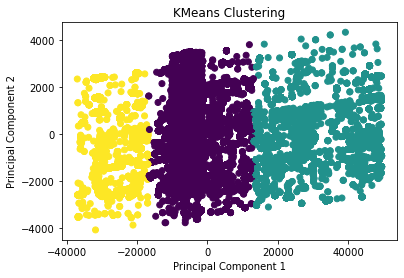

In [24]:
#Наиболее посещаемые страницы 

page_visits_counts = df['request_path'].value_counts()

print(page_visits_counts.head(30))

/                                                                         145250
https://mitigator.ru/                                                      31375
/js/tilda-events-1.0.min.js                                                  188
/js/lazyload-1.3.min.js                                                      185
/js/tilda-zero-1.1.min.js                                                    183
/js/tilda-scripts-3.0.min.js                                                 177
/js/tilda-forms-1.0.min.js                                                   176
/js/tilda-zero-forms-1.0.min.js                                              173
/js/tilda-zero-scale-1.0.min.js                                              173
/css/tilda-grid-3.0.min.css                                                  157
/css/tilda-forms-1.0.min.css                                                 157
/js/tilda-stat-1.0.min.js                                                    153
/js/tilda-animation-2.0.min.

In [25]:
#Определение местонахождения пользователей

# import requests

# def get_location_by_ip(ip_address, country_list):
#     # URL для запроса
#     api_key = "a7c341596a5ca580c3a5ceea3ac017dc"
#     url = f"http://api.ipstack.com/{ip_address}?access_key={api_key}"

#     try:
#         # Отправляем запрос и получаем ответ в формате JSON
#         response = requests.get(url)
#         data = response.json()
        
#         # Извлекаем интересующие нас данные о местоположении
# #         city = data.get('city', 'N/A')
#         country = data.get('country_name', 'N/A')

#         # Выводим информацию о местоположении
# #         print("Местоположение по IP:")
# #         print(f"Город: {city}")
# #         print('\n')

#         country_list.append(country)
# #         city_list.append(city)
#     except requests.exceptions.RequestException as e:
#         print("Произошла ошибка при запросе к API:", e)

# # Ваш API-ключ от ipstack

# country_list = []
# ip_addr_list = df['remote_addr'].unique().tolist()

# for i in ip_addr_list:
# # IP-адрес для запроса местоположения
#     ip_address = i 
    
# # Получаем информацию о местоположении по IP
#     get_location_by_ip(ip_address, country_list)



In [26]:

# print(country_list)

# from collections import Counter

# counter = Counter(country_list)

# plt.figure(figsize=(12, 7))
# plt.plot(counter.items(),counter.values(), marker='o')

# plt.ylabel('Количество')
# plt.xlabel('Страны')
# plt.title('Страны пользователей')
# plt.grid(which='both', linewidth=0.5) 
# plt.show()


In [27]:
# Зависимость body_bytes_sent от request_path

In [33]:
data = {
    'col2': ['A', 'B', 'C', 'D', 'D'],
}

df = pd.DataFrame(data)

# Создайте отображение значений столбца 'col2' в целые числа
mapping, unique_values = pd.factorize(df['col2'])

# Присвойте новое целое представление столбцу 'col2'
df['col2'] = mapping

# Результат
print(df)


   col2
0     0
1     1
2     2
3     3
4     3
